In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [39]:
import scipy.signal as sig
import lal
import scipy.linalg as sl

In [40]:
import pandas as pd

In [286]:
import utils.data
from importlib import reload
reload(utils.data)

x = utils.data.Data(random.normal(0, 1, 1025), ifo='H1')
p = x.get_psd(nperseg=len(x))

freq, psd = sig.welch(x, fs=1, nperseg=len(x))

In [287]:
f = utils.data.Fit()

In [288]:
f.set_target(0, 1.92, 0.8, 0)

In [289]:
f.target

Target(t0=0, ra=1.92, dec=0.8, psi=0)

In [279]:
f.add_data(x)

In [281]:
f.t0

In [280]:
f.target

Target(t0=None, ra=None, dec=None, psi=None)

In [275]:
f._data

{'H1': 0       0.181238
 1       0.361851
 2      -0.615493
 3      -0.039410
 4       0.745638
           ...   
 1020   -0.706644
 1021    0.980250
 1022    0.904102
 1023    0.663150
 1024   -0.586577
 Length: 1025, dtype: float64}

In [253]:
r = x.get_acf(method='fd', nperseg=len(x))
p2 = r.to_psd()
r2 = p2.to_acf()

1


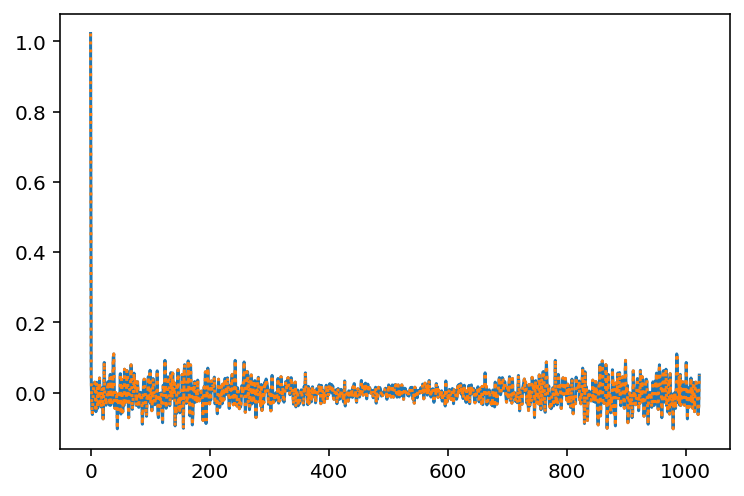

In [247]:
plot(r)
plot(r2, ls=':')

In [248]:
r

0       1.022616
1       0.050208
2      -0.037834
3      -0.062018
4      -0.018971
          ...   
1019    0.020901
1020   -0.018971
1021   -0.062018
1022   -0.037834
1023    0.050208
Length: 1024, dtype: float64

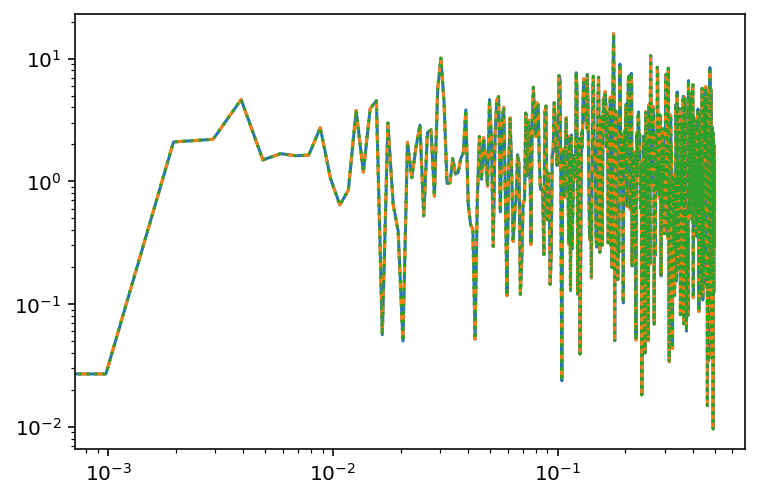

In [250]:
loglog(p2.freq, p2)
loglog(p.freq, p, ls='--')
loglog(freq, psd, ls=':')

In [134]:
x.duration, 1/p.delta_f

(1000, 1000.0)

In [108]:
0.5/(max(p.freq))

1.001

In [100]:
x.delta_t

1

In [85]:
x.delta_t, p.delta_t

(1, 1.001)

In [86]:
0.5*1/max(p.freq)

1.001

In [87]:
y = x.condition(ds=2)
p = y.get_psd(nperseg=len(y))

freq, psd = sig.welch(y, nperseg=len(y))

In [90]:
y.duration, 1/p.delta_f

(1002, 1002.0000000000001)

In [91]:
y.delta_t, p.delta_t

(2, 2.004)

In [94]:
0.5/((len(p)-1)*p.delta_f)

2.004

In [95]:
len(x), len(p)

(1001, 251)

In [82]:
0.5*1/max(p.freq)

2.0

In [123]:
r2 = r[:50]

In [3]:
np.sgn(4)

NameError: name 'np' is not defined

In [125]:
r2.cholesky

array([[ 1.01299711,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01449097,  1.01289346,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07596848,  0.01340561,  1.01005556, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.03089681,  0.03245532, -0.03959109, ...,  0.98905855,
         0.        ,  0.        ],
       [ 0.00853969,  0.0307778 ,  0.031939  , ...,  0.01512257,
         0.98903319,  0.        ],
       [ 0.01085603,  0.00838525,  0.03005899, ...,  0.07318041,
         0.01512421,  0.98903315]])

In [118]:
%%time
r.cholesky

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 18.8 µs


array([[ 1.01299711,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01449097,  1.01289346,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07596848,  0.01340561,  1.01005556, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05045394,  0.00308472, -0.03365417, ...,  0.32651084,
         0.        ,  0.        ],
       [ 0.01125655, -0.05062014,  0.00219475, ...,  0.05519541,
         0.29371736,  0.        ],
       [ 0.07596848,  0.01017086, -0.05644962, ...,  0.14788892,
        -0.01045048,  0.25949196]])

In [106]:
r.delta_t

1

In [79]:
Rho(range(5))

Rho([], shape=(0, 1, 2, 3, 4), dtype=float64)

In [58]:
x.fsamp

1.0

In [59]:
y = x.condition(ds=2)

In [60]:
y

0     -0.086772
2      1.007600
4      0.435375
6     -0.545496
8      1.063382
         ...   
990   -1.179690
992   -0.093802
994   -1.380231
996   -0.900706
998    0.152436
Length: 500, dtype: float64

In [62]:
y.fsamp

0.5

In [20]:
z = x.copy()